In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import sys
sys.path.append(os.getcwd() + '/..')
from plotting import settings, fig_size, cb_line_cycler, cb_line_cycler_solid, cb_marker_cycler, savefig
import matplotlib
settings()
import matplotlib.pyplot as plt
import h5py

path_dataset = Path(r'data\beautiful-bee-525\dataset.hdf5')

In [2]:
dataset = h5py.File(path_dataset, 'r')
print(dataset.keys())

<KeysViewHDF5 ['common_test', 'common_validation', 'controls_names', 'outputs_names', 'parameters_names', 'states_der_names', 'states_names', 'test', 'time', 'train', 'validation']>


In [3]:
dataset_type = 'common_test'
kl_lat_state_0_per_dim = dataset[dataset_type]['kl_lat_state_0_per_dim'][:]
lat_states_hat = dataset[dataset_type]['lat_states_hat'][:]
kl_lat_states = dataset[dataset_type]['kl_lat_states_per_dim'][:]

c:\Users\userXXX\miniconda3\envs\th_ak\lib\site-packages\IPython\core\events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
c:\Users\userXXX\miniconda3\envs\th_ak\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


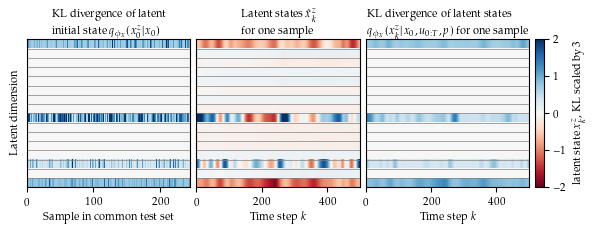

In [4]:
fig = plt.figure(figsize=fig_size(2), tight_layout=True)
fontsize = 8

grid_spec = matplotlib.gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.05], wspace=0.05, top=0.85, left=0.05, right=0.90)
ax = [fig.add_subplot(grid_spec[i]) for i in range(4)]
for i in range(1,3):
    # share y axis
    ax[i].sharey(ax[0])
    # remove y ticks
    ax[i].set_yticks([])
# fig, ax = plt.subplots(1, 2, figsize=fig_size(2.0),)
cmap = 'RdBu'

ax[0].imshow(kl_lat_state_0_per_dim.T, aspect='auto', cmap = cmap, interpolation= 'none', vmin=-6, vmax=6)
# add horizontal lines on y axis
for i in range(1, kl_lat_state_0_per_dim.shape[1]):
    ax[0].axhline(i-0.5, color='grey', lw=0.5)
ax[0].set_xlabel('Sample in common test set', fontsize=8)
ax[0].set_ylabel('Latent dimension', fontsize=8)
ax[0].set_title(r'\noindent KL divergence of latent\\initial state $q_{\phi_{x}}(x^z_0|x_0)$', fontsize=8, loc='center')

ax[1].imshow(lat_states_hat[0,:, :], aspect='auto', cmap = cmap, interpolation= 'none', vmin=-2, vmax=2)
# add horizontal lines on y axis
for i in range(1, lat_states_hat.shape[1]):
    ax[1].axhline(i-0.5, color='grey', lw=0.5)
ax[1].set_xlabel(r'Time step $k$', fontsize=8)
ax[1].set_title(r'\noindent Latent states $\hat{x}^z_k$ \\for one sample', fontsize=8, loc='center')

ax[2].imshow(kl_lat_states[0, :, :], aspect='auto', cmap = cmap, interpolation= 'none', vmin=-6, vmax=6)
# add horizontal lines on y axis
for i in range(1, lat_states_hat.shape[1]):
    ax[2].axhline(i-0.5, color='grey', lw=0.5)
ax[2].set_xlabel(r'Time step $k$', fontsize=8)
ax[2].set_title(r'\noindent KL divergence of latent states\\ $q_{\phi_{x}}(x^z_k|x_0, u_{0:T}, p)$ for one sample', fontsize=8, loc='center')

# add colorbar to the right
cbar = plt.colorbar(ax[1].images[0], cax=ax[-1], orientation='vertical')
cbar.set_label(r'\noindent latent state $x^z_k$, KL scaled by 3', fontsize=8)
cbar.ax.tick_params(labelsize=8)

# set all x ticks to fontsize
for i in range(3):
    ax[i].tick_params(axis='x', labelsize=fontsize)



In [5]:
savefig(fig, '../../../../latex/thesis_chapters/figures/Methods/latent-ode/lat_ode_kl_cont')

c:\Users\userXXX\Documents\gitlab.xrg-online\master_thesis_userXXX\code\python\analysis\C03_Methods/..\plotting.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(filename + '.' + file_type, **kwargs, )
